<a href="https://colab.research.google.com/github/Phenomenan/PyTorchUdacity/blob/master/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
# Imports here
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision.models as models
from PIL import Image
import json
from matplotlib.ticker import FormatStrFormatter

In [0]:
!wget https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

In [0]:
!unzip flower_data.zip

In [0]:
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

In [0]:
# TODO: Define your transforms for the training and validation sets
train_data_transforms = transforms.Compose([
        transforms.Resize([255,255]),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
        ])

# TODO: Load the datasets with ImageFolder
train_datasets = datasets.ImageFolder(root=train_dir, transform=train_data_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
train_dataloader = torch.utils.data.DataLoader(train_datasets,
                                          batch_size=4, shuffle=True)

In [0]:
# transforms for validation sets
valid_data_transforms = transforms.Compose([
        transforms.Resize([255,255]),
        transforms.CenterCrop(224),
        transforms.ToTensor()
        ])
# TODO: Load the datasets with ImageFolder
valid_datasets = datasets.ImageFolder(root=valid_dir, transform=train_data_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
valid_dataloader = torch.utils.data.DataLoader(train_datasets,
                                          batch_size=4, shuffle=False)

In [0]:
train_images, train_labels = next(iter(train_dataloader))

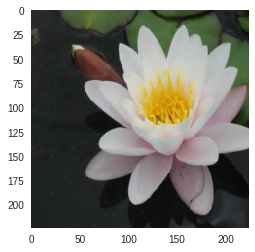

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False # to disable grid output

disp_train_img = np.transpose(train_images.numpy()[0], (1,2,0))
plt.imshow(disp_train_img)

In [0]:
!wget https://github.com/Phenomenan/PyTorchUdacity/blob/master/cat_to_name.json  

In [7]:
# Download pretrained model, use pretrained weight
model_resnet34 = models.resnet34(pretrained=True) # use ResNet34
model_resnet34.to("cuda")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 74416237.87it/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [8]:
# Freeze parameters so we don't backprop through them
for param in model_resnet34.parameters():
    param.requires_grad = False # freeze all parameters first by disabling the gradient computation

from collections import OrderedDict
# create a classifier which includes two fully-connected layers
classifier = nn.Sequential(OrderedDict([ # use sequential module
                          ('fc1', nn.Linear(512, 256)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(256, 102)),
                          ('output', nn.LogSoftmax(dim=1)) # output is log_ps
                          ]))
# replace the new classifier, the parameters of classifier can be tuned (not freezed), requires_grad = True.    
model_resnet34.fc = classifier 
model_resnet34.to("cuda")

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
# Specify Loss Function
criterion = nn.NLLLoss()

# Specify optimizer
# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model_resnet34.fc.parameters(), lr=0.001)

In [0]:
train_on_gpu = True

In [0]:
# Train the network
n_epochs = 30 # number of epochs to train the model

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0 # reset to zero for each epoch
    valid_loss = 0.0
    valid_accuracy = 0.0
    ###################
    # train the model #
    ###################
    model_resnet34.train() # set to train mode for model (which contains dropout layer)
    for data, target in train_dataloader: # loop through each batch
        # move input tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_resnet34(data) # <=> model.forward(data), the output is log_ps
        # calculate the batch loss
        loss = criterion(output, target) # NLL loss
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0) # Here, the loss.item() alreay returns a mean value, by multipled with batchsize (data.size(0)) for later divided by total number
    # After one training epoch    
    ######################    
    # validate the model #
    ######################
    model_resnet34.eval() # set the model to evaluation mode (dropout will be cancelled)
    for data, target in valid_dataloader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model_resnet34(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0) # desire to get validation loss
        # to compute valid_accuracy
        ps = torch.exp(output) # get prob. distribution
        top_p, top_class = ps.topk(1, dim=1) # get top-1 prediction
        equals = top_class == target.view(*top_class.shape)
        valid_accuracy += torch.mean(equals.type(torch.FloatTensor)) # get batch valid accuracy
    
    # calculate average losses
    train_loss = train_loss/len(train_dataloader) # divided by number of batches
    valid_loss = valid_loss/len(valid_dataloader)
    valid_accuracy = valid_accuracy/len(valid_dataloader)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Acc: {:.6f}'.format(
        epoch, train_loss, valid_loss, valid_accuracy))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model.'.format(valid_loss_min, valid_loss))
        torch.save(model_resnet34.state_dict(), '../models/model_flower.pt')
        valid_loss_min = valid_loss
